## Predicting heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

The following approach is to be taken:

1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters, can we predict whether a patient has heart disease or not?

## 2. Data

The original data came from Cleveland Data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

The Kaggle version link: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features of your data.

**Create Data Dictionary**

* age
* sex (1=Male, 0=Female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved (thalach in dataset)
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools

We use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need 

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis (EDA))

The goal here is to find out more about the data, and become a subject matter expert on the data you are working with.

1. What questions are you trying to solve?
2. What kind of data do we have?
3. How do we treat different types?
4. What is missing from the data?
5. How do you deal with missing data?
6. Where are the outliers and why should you care about them?
7. How can you add, change or remove features to get more out of your data?

In [4]:
# Lets find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

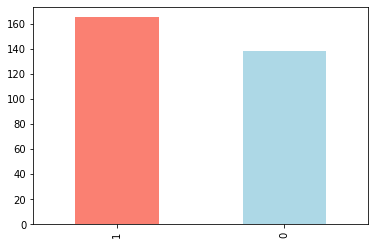

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


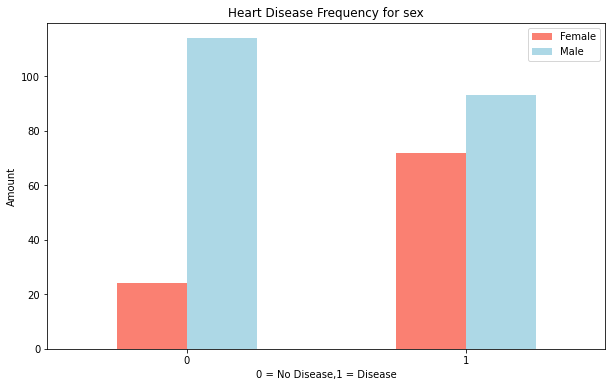

In [11]:
# Create a plot of above crosstab
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [12]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

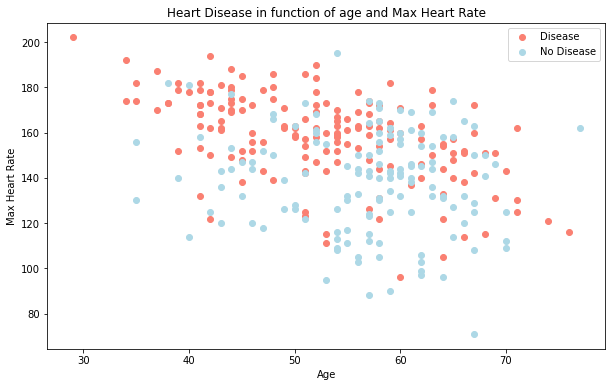

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive samples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon");

# Scatter with negative samples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue");

# Add helpful info about graph
plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

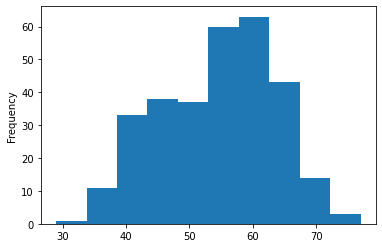

In [14]:
# Check the distribution of age column with a histogram
df["age"].plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. cp - Chest pain type:
* 0 : Typical angina: chest pain related decrease blood supply to the heart
* 1 : Atypical angina: chest pain unrelated to heart
* 2 : Non-anginal pain: typically esophagael spasms (Not heart related)
* 3 : Asymptomatic: chest pain not showing any signs of disease

In [15]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


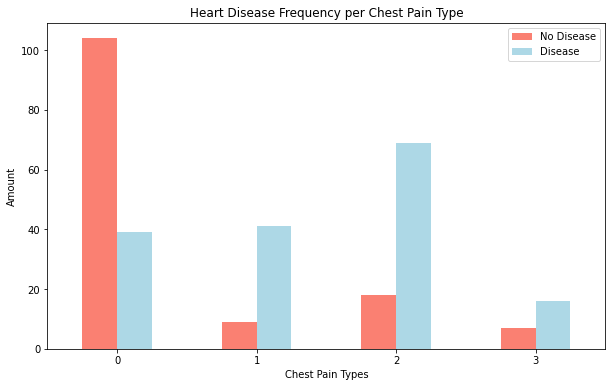

In [16]:
# Make the crosstab more visual
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Types")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);
plt.xticks(rotation=0);

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


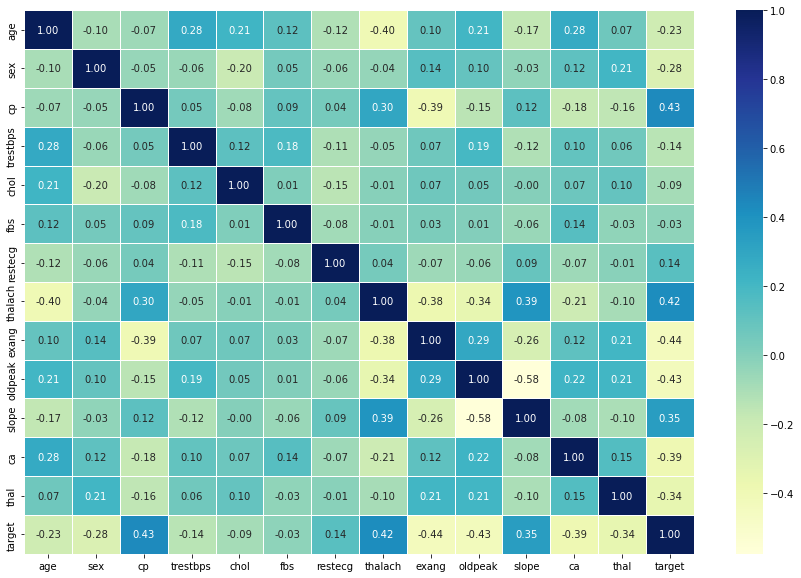

In [18]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

## 5. Modelling

In [19]:
# Split data into Features and labels and then do the train and test splits
X = df.drop("target",axis=1)
y = df["target"]

np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Now we have split the data into training and test sets, its time to build a machine learning model.

Use the scikit-learn map for insights.

We will be trying our 3 different machine learning models:

1. Logistic Regression
2. K Neighbors Classifier
3. Random Forest Classifier

In [20]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest Classifier": RandomForestClassifier()}

# Create Function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Sci-kit learn models.
    X_train: training data (No labels)
    X_test: testing data (No labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_Scores
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [21]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

C:\Users\Avi\Desktop\heart-disease-project\emv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [22]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


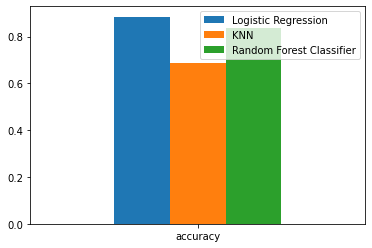

In [24]:
model_compare.plot.bar();
plt.xticks(rotation=0);

We have got a baseline model now. Since we know that a model's first predictions aren't always what we should base our next steps off - what do we do?

Lets take a look at the following:

1. Hyperparameter tuning
2. Feature Importance
3. Confusion Matrix
4. Cross Validation
5. Precision
6. Recall
7. Classification Report
8. F1 Score
9. ROC Curve
10. Area Under Curve (AUC)

### Hyperparameters Tuning (By Hand)

In [26]:
# Try tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors.
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the train Scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


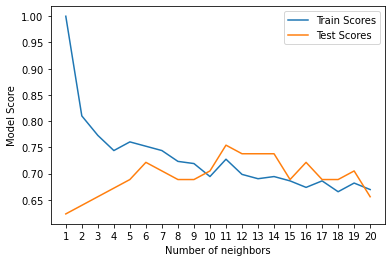

In [30]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1,21,1)) 
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

As seen from above graph, n_neighbors value of 11 yields a test_score of 75% which is higher than baseline. This was done after hyperparameters tuning for K-Neighbors Classifier.

The score of 75% is still lower than the baseline value for logistical regresion as well as the Random Forest Classifier value. So, we should try tuning these models to get a better score.

## Hyperparameter tuning with RandomizedSearchCV()

We will be tuning:
1. LogisticRegression()
2. RandomForestClassifier()

using RandomizedSearchCV.

In [31]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Now we have the hyperparameter grids set up for each of our models, we tune them using RandomizedSearchCV.

In [33]:
# Tune LogisticRegression()
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

As seen above, the score obtained is very much close to the baseline model score obtained. Now, we move and check the RandomForestClassifier Model and see if it can be tuned to a higher score.

In [37]:
# Setup random Seed
np.random.seed(42)

# Setup random hyperparameter search grid for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,cv=5,verbose=True)

# Fit random Forest Classifier model with RandomizedSearchCV
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [40]:
model_scores # Baseline scores for baseline models created

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Hyperparameter tuning using GridSearchCV()

Since our LogisticRegression model provides the best scores so far, we try to improve them using GridSearchCV().

In [41]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned Machine Learning Classifier (Beyond Accuracy)

* ROC and AUC
* Confusion Matrix
* Recall
* F1 Score
* Classification Report

Use Cross-Validation wherever possible.

To make comparisons and evaluate our trained model, we need to make predictions.

In [46]:
# Make predictions on trained model
y_preds = gs_log_reg.predict(X_test)

C:\Users\Avi\Desktop\heart-disease-project\emv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


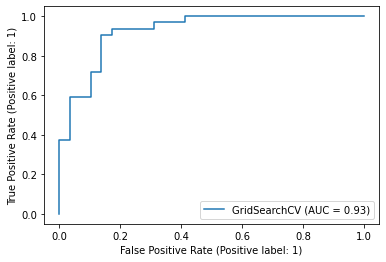

In [48]:
# Import ROC curve function from sklearn.metrics as done above, and then calculate the AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test);

In [52]:
# Confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

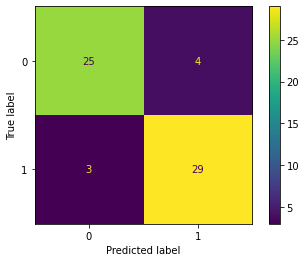

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

Now we have a ROC curve and a Confusion Matrix. Lets get a classification report as well as a cross-validated precision, recall and F1-score.

In [58]:
print(classification_report(y_preds,y_test));

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We will calculate precision, recall and F1-score of our model using cross-validation and to do so, we use `cross_val_score()`

In [59]:
## Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Create a classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [67]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [68]:
# Cross-validated precision
cv_prc = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prc = np.mean(cv_prc)
cv_prc

0.8207936507936507

In [69]:
# Cross-validated recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [70]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

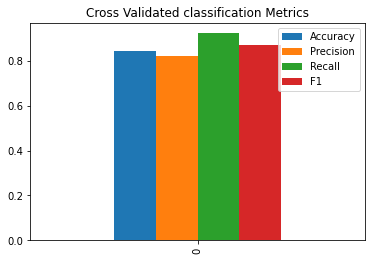

In [72]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prc,
                          "Recall": cv_rec,
                          "F1": cv_f1},index=[0])

cv_metrics.plot.bar(title="Cross Validated classification Metrics");

### Feature Importance

Feature importance is another way of asking which features contributed most to the outcomes of the model, and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find the feature importance is to search for "(MODEL NAME) feature importance".

Lets find the feature importance of our Logistic Regression model.

In [73]:
# Fit an instance of logistic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [76]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [77]:
# check the coefficient
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [79]:
# Match coef_'s of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

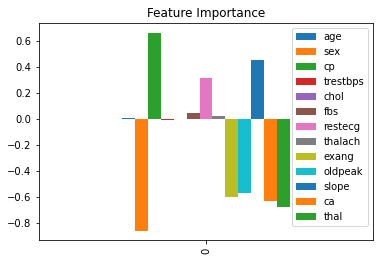

In [80]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.plot.bar(title="Feature Importance");

## 6. Experimentation

If the required evaluation metric hasn't been met, question TBA:

1. Could you collect more data?
2. Could you try a better model? - Like CatBoost or XGBoost?
3. Could you improve the current model? - Beyond what we've done so far.